Logistic Regression Accuracy: 0.7733333333333333
Random Forest Accuracy: 0.7533333333333333

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56        91
           1       0.80      0.90      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300


Random Forest Report:
               precision    recall  f1-score   support

           0       0.70      0.33      0.45        91
           1       0.76      0.94      0.84       209

    accuracy                           0.75       300
   macro avg       0.73      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300



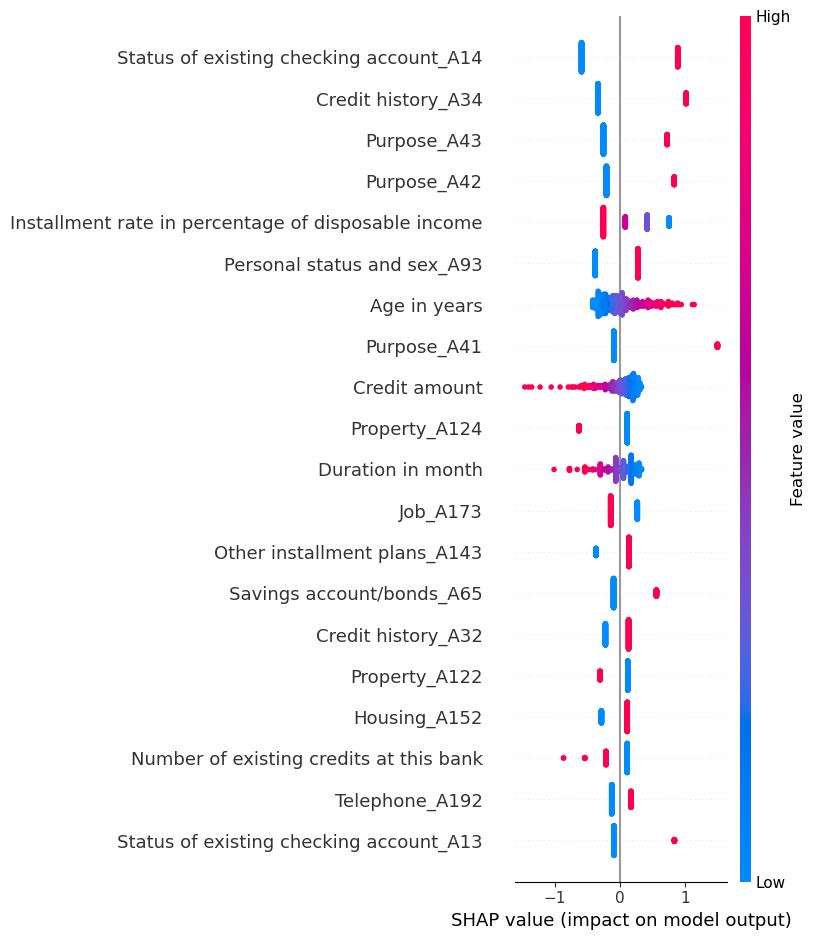

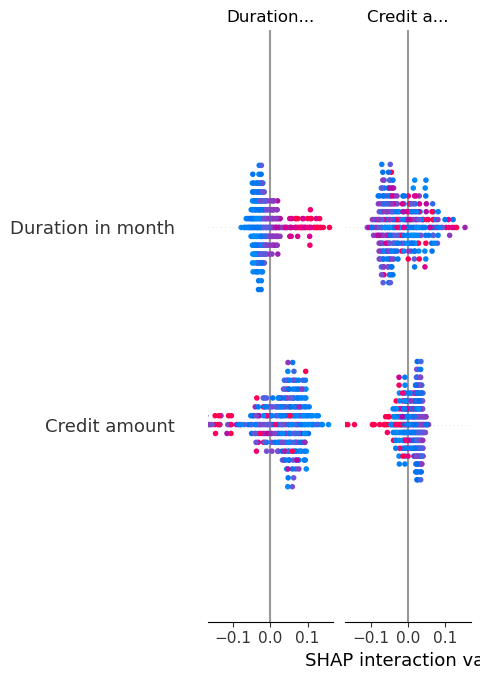

Intercept 1.2617567396794764
Prediction_local [0.88112941]
Right: 0.6033452865730664


Intercept 0.7194288732929723
Prediction_local [0.62850483]
Right: 0.68


In [5]:
# Step 1: Install necessary libraries
!pip install shap lime scikit-learn pandas matplotlib

# Step 2: Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Step 3: Load dataset
# For this example, we'll use the German credit dataset available in UCI Machine Learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose', 'Credit amount',
           'Savings account/bonds', 'Present employment since', 'Installment rate in percentage of disposable income',
           'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age in years',
           'Other installment plans', 'Housing', 'Number of existing credits at this bank', 'Job',
           'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', 'Target']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=columns)

# Step 4: Data preprocessing
# Convert categorical features using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop(columns=['Target'])
y = df['Target'].apply(lambda x: 1 if x == 1 else 0)  # Convert target to binary (1: Good credit, 0: Bad credit)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train models
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))

# Step 6: SHAP for Interpretability
# Explaining Logistic Regression with SHAP
explainer_lr = shap.LinearExplainer(lr, X_train)  # Use LinearExplainer for Logistic Regression
shap_values_lr = explainer_lr(X_test)

# Plot summary of SHAP values for Logistic Regression
shap.summary_plot(shap_values_lr, X_test, feature_names=X.columns)

# Explaining Random Forest with SHAP
explainer_rf = shap.TreeExplainer(rf)  # Use TreeExplainer for Random Forest
shap_values_rf = explainer_rf(X_test, check_additivity=False)  # Disable additivity check here

# Plot summary of SHAP values for Random Forest
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns)

# Step 7: LIME for Interpretability
# Use LIME to explain a single instance from the test set
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Bad Credit', 'Good Credit'], verbose=True, mode='classification')

# Explain the first instance in the test set for Logistic Regression
exp_lr = explainer.explain_instance(X_test[0], lr.predict_proba)
exp_lr.show_in_notebook(show_table=True)

# Explain the first instance in the test set for Random Forest
exp_rf = explainer.explain_instance(X_test[0], rf.predict_proba)
exp_rf.show_in_notebook(show_table=True)



Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.68      0.48      0.56        91
           1       0.80      0.90      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.76      0.77      0.76       300



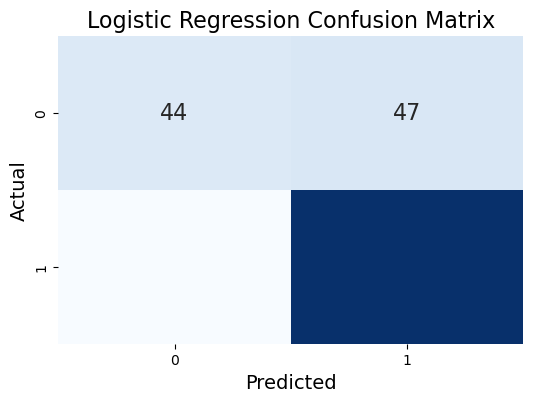

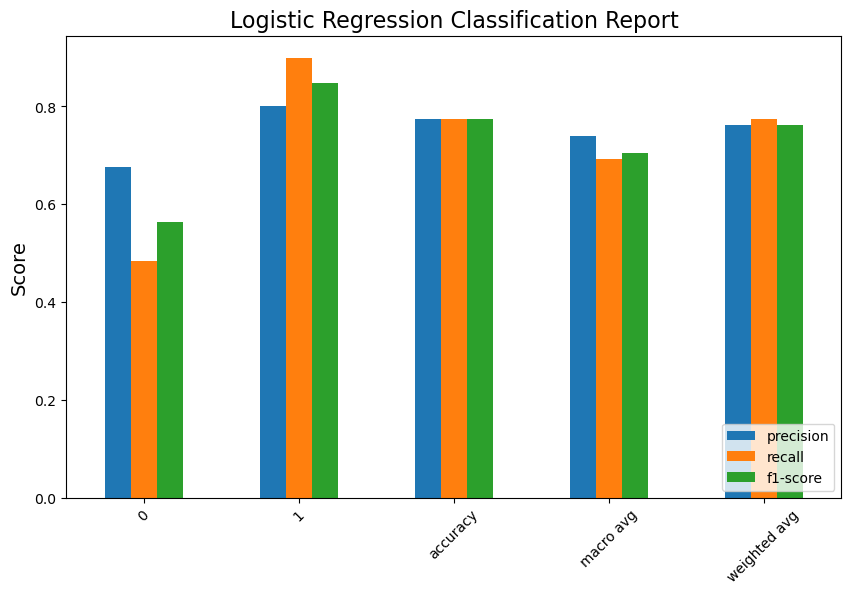


Random Forest Report:
               precision    recall  f1-score   support

           0       0.70      0.33      0.45        91
           1       0.76      0.94      0.84       209

    accuracy                           0.75       300
   macro avg       0.73      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300



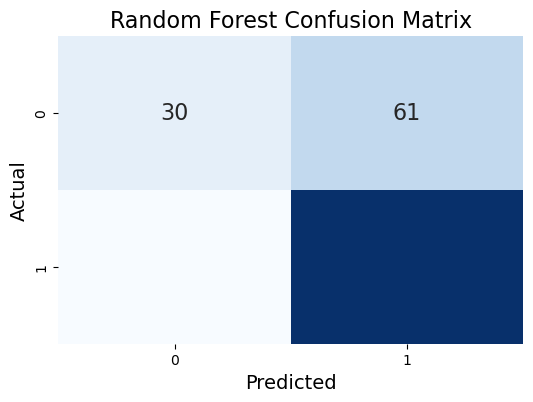

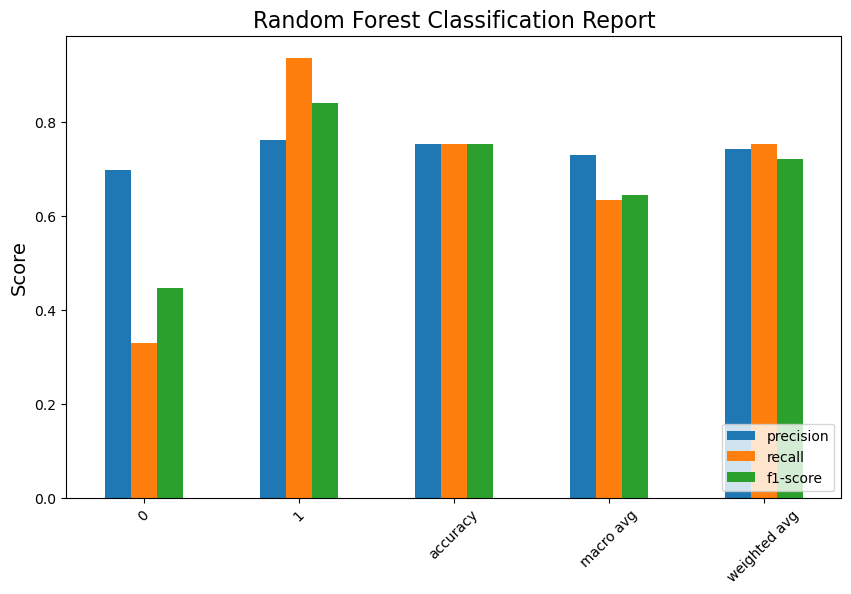

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.show()

# Function to plot classification report
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    # Convert the classification report to DataFrame
    df_report = pd.DataFrame(report).iloc[:-1, :].T  # Exclude the 'accuracy' row
    df_report.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{model_name} Classification Report', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.show()

# Plot for Logistic Regression
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_classification_report(y_test, y_pred_lr, "Logistic Regression")

# Plot for Random Forest
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_classification_report(y_test, y_pred_rf, "Random Forest")
